In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'SquareFootage': [1500, 2000, 2500, 3000, 3500],
    'Bedrooms': [3, 4, 4, 5, 5],
    'Bathrooms': [2, 2, 3, 3, 4],
    'Price': [300000, 400000, 500000, 600000, 700000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define features and target variable
X = df[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Output the coefficients
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Mean Absolute Error: 5.820766091346741e-11
Root Mean Squared Error: 5.820766091346741e-11
Coefficients: [1.999996e+02 1.999996e-01 1.999996e-01]
Intercept: -0.39999919990077615


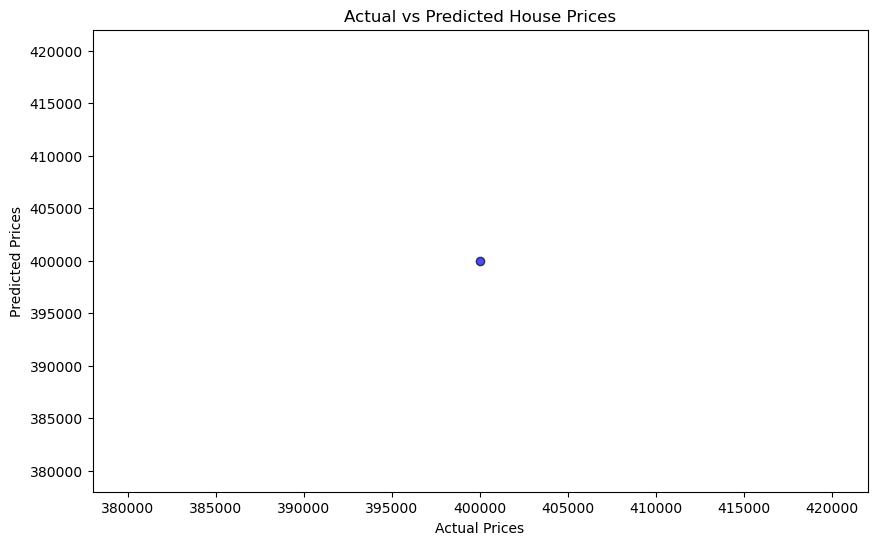

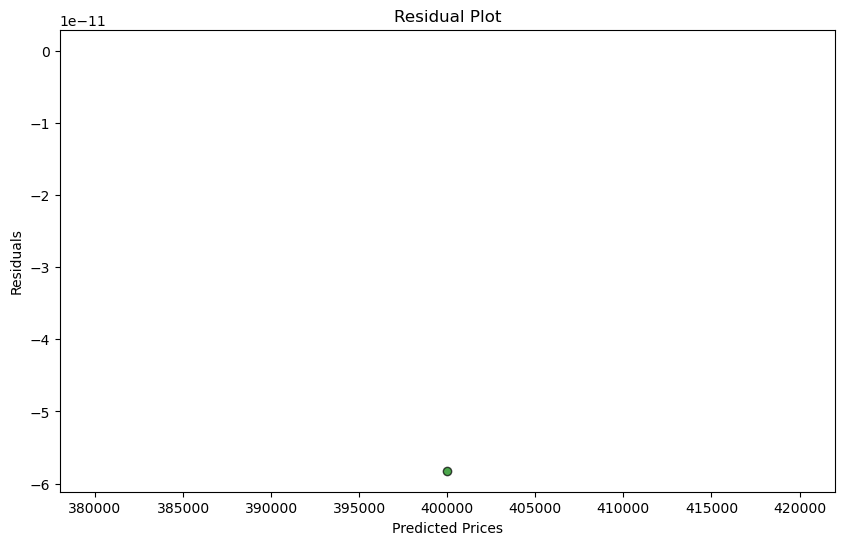

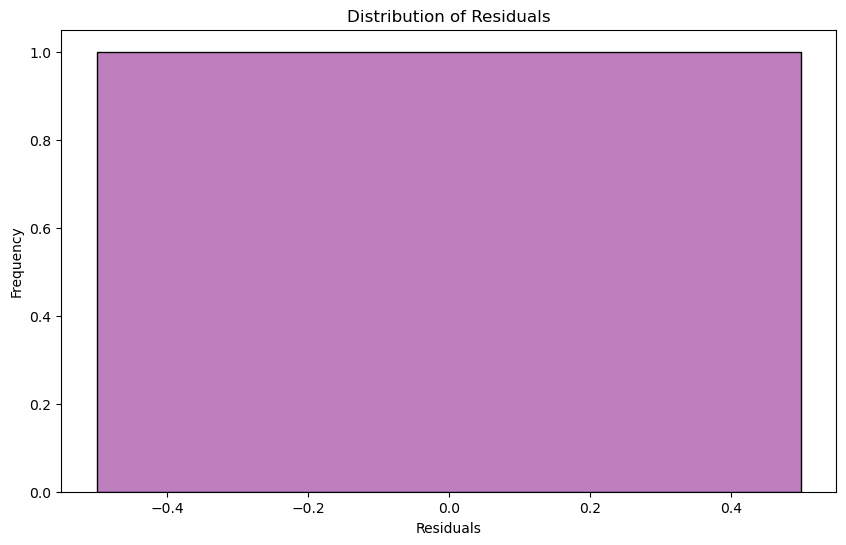

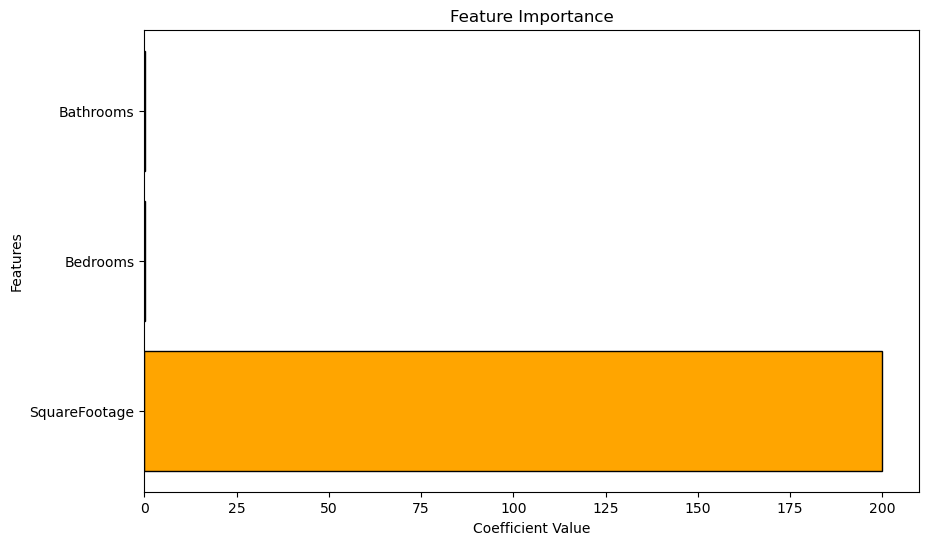

In [2]:
# Visualization

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Line of best fit
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', edgecolors='k', alpha=0.7)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='dashed', lw=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# Distribution plot of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', edgecolor='k')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Bar plot of feature importance
features = X.columns
importance = model.coef_

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='orange', edgecolor='k')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()